In [226]:
# Import the necessary parameters to measure/analyse the data

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


The chosen data is primarily time series data. For this reason, investigating the seasonal changes and standard measures provide the best data for analysis purposes.

In [227]:
# Load the "Flight Data". This data reveals the short-term visitors entering each state in Australia from 2013 to 2022

flight_data_to_load = os.path.join("visitor_arrivals.csv")
flight_data = pd.read_csv(flight_data_to_load)
flight_data = flight_data.dropna()
flight_data.columns.values.tolist()
flight_data

,Date,"Short-term visitor arrivals, ACT ('000)","Short-term visitor arrivals, NT ('000)","Short-term visitor arrivals, Tas. ('000)","Short-term visitor arrivals, WA ('000)","Short-term visitor arrivals, SA ('000)","Short-term visitor arrivals, Qld ('000)","Short-term visitor arrivals, Vic. ('000)","Short-term visitor arrivals, NSW ('000)"
0,Jan 2013,5.69,4.80,4.76,55.13,15.23,102.45,111.75,188.87
1,Feb 2013,8.17,4.71,7.27,63.90,19.84,128.25,146.41,238.43
2,Mar 2013,5.01,6.22,4.54,65.89,18.75,127.57,139.93,220.95
3,Apr 2013,4.42,9.19,2.71,50.83,13.66,103.84,100.11,176.77
4,May 2013,4.16,6.33,2.34,44.58,10.07,100.58,90.68,154.60
...,...,...,...,...,...,...,...,...,...
116,Sep 2022,5.43,3.86,3.03,41.29,12.02,86.91,90.29,128.98
117,Oct 2022,5.30,2.56,5.22,44.87,14.68,96.97,110.02,150.84
118,Nov 2022,6.91,2.95,7.51,57.00,17.14,99.10,133.52,181.04
119,Oct 2022,5.30,2.56,5.22,44.87,14.68,96.97,110.02,150.84


In [228]:
# Rename the Flight Data to be more presentable in graph format

flight_data = flight_data.rename(columns={'Date' : "Year of Arrival",
 "Short-term visitor arrivals, ACT ('000)":"ACT",
 "Short-term visitor arrivals, NT ('000)" : "NT",
 "Short-term visitor arrivals, Tas. ('000)" : "Tas.",
 "Short-term visitor arrivals, WA ('000)" : "WA",
 "Short-term visitor arrivals, SA ('000)" : "SA",
 "Short-term visitor arrivals, Qld ('000)" : "Qld.",
 "Short-term visitor arrivals, Vic. ('000)" : "Vic.",
 "Short-term visitor arrivals, NSW ('000)" : "NSW"})

flight_data

,Year of Arrival,ACT,NT,Tas.,WA,SA,Qld.,Vic.,NSW
0,Jan 2013,5.69,4.80,4.76,55.13,15.23,102.45,111.75,188.87
1,Feb 2013,8.17,4.71,7.27,63.90,19.84,128.25,146.41,238.43
2,Mar 2013,5.01,6.22,4.54,65.89,18.75,127.57,139.93,220.95
3,Apr 2013,4.42,9.19,2.71,50.83,13.66,103.84,100.11,176.77
4,May 2013,4.16,6.33,2.34,44.58,10.07,100.58,90.68,154.60
...,...,...,...,...,...,...,...,...,...
116,Sep 2022,5.43,3.86,3.03,41.29,12.02,86.91,90.29,128.98
117,Oct 2022,5.30,2.56,5.22,44.87,14.68,96.97,110.02,150.84
118,Nov 2022,6.91,2.95,7.51,57.00,17.14,99.10,133.52,181.04
119,Oct 2022,5.30,2.56,5.22,44.87,14.68,96.97,110.02,150.84


In [229]:
# Reformat the data for ease of readability
flight_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ACT,NT,Tas.,WA,SA,Qld.,Vic.,NSW
count,121,121,121,121,121,121,121,121
mean,5.64843,5.19157,4.43463,51.5599,15.058,113.699,128.563,194.05
std,3.31901,3.36371,3.37184,28.7803,8.66422,62.4922,74.8808,109.735
min,0.06,0.01,0.01,0.25,0.05,0.6,0.22,0.72
25%,4.22,2.95,2.14,41.29,10.39,86.91,90.68,128.98
50%,5.95,5.44,3.95,59.17,16.83,133.5,139.93,221.4
75%,7.79,7.46,6.16,69.95,20.55,156.16,181.35,269.51
max,14.42,13.62,14.9,111.8,33.3,212.05,299.56,403.74


In [230]:
# Create a new dataframe which contains pre-covid data (this is deemed  BEFORE April 2020)
    	# With the data, determine the monthly increse in visitors to Australia and generate a trendline and correlation coefficient

pre_covid_growth = flight_data.drop(flight_data.index[87:121])
pre_covid_growth_total = pre_covid_growth.sum(1)
pre_covid_pct_change = pre_covid_growth_total.pct_change()

pre_pct_mean = pre_covid_pct_change.mean()
max_visitors = pre_covid_growth_total.mean()

data = [[pre_pct_mean, max_visitors]]

pre_covid_analysis = pd.DataFrame(data, columns = ['Mean Monthly Growth', 'Average Monthly Visitors'])
pre_covid_analysis

,Mean Monthly Growth,Average Monthly Visitors
0,0.013807,671.633103


In [231]:
# Get the summary statistics of the pre-covid data
pre_covid_growth.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ACT,NT,Tas.,WA,SA,Qld.,Vic.,NSW
count,87,87,87,87,87,87,87,87
mean,7.15023,6.81644,5.60414,66.7372,19.2921,147.711,166.066,252.256
std,2.28261,2.35707,3.04322,13.9056,5.26107,27.532,44.8731,57.1979
min,4.05,1.67,1.5,35.49,9.86,62.11,90.68,114.51
25%,5.16,4.985,3.315,58.825,15.165,128.305,132.755,211.98
50%,6.96,6.49,4.8,63.79,18.62,146.07,168.98,249.41
75%,8.27,8.23,7.075,73.185,22.445,165.65,191.155,282.73
max,14.42,13.62,14.9,111.8,33.3,212.05,299.56,403.74


In [232]:
# Create a new dataframe which contains post-covid data (this is deemed AFTER April 2020)
    	# With the data, determine the monthly increse in visitors to Australia and generate a trendline and correlation coefficient

post_covid_growth = flight_data.drop(flight_data.index[0:87])
post_covid_growth_total = post_covid_growth.sum(1)
post_covid_pct_change = post_covid_growth_total.pct_change()

post_pct_mean = post_covid_pct_change.mean()
max_visitors = post_covid_growth_total.mean()

data2 = [[post_pct_mean, max_visitors]]

post_covid_analysis = pd.DataFrame(data2, columns = ['Mean Monthly Growth', 'Mean Monthly Visitors'])
post_covid_analysis



,Mean Monthly Growth,Mean Monthly Visitors
0,0.347443,125.608235


In [233]:
# Get the summary statistics of the post-covid data
post_covid_growth.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ACT,NT,Tas.,WA,SA,Qld.,Vic.,NSW
count,34,34,34,34,34,34,34,34
mean,1.80559,1.03382,1.44206,12.7238,4.22382,26.6679,32.6009,45.1103
std,2.30613,1.37615,2.09166,18.624,5.71355,37.0383,44.1167,58.951
min,0.06,0.01,0.01,0.25,0.05,0.6,0.22,0.72
25%,0.0925,0.1075,0.09,0.6525,0.195,1.2825,0.8075,2.1375
50%,0.26,0.34,0.36,1.245,0.645,4.22,3.655,10.575
75%,3.29,1.67,2.26,26.465,8.435,46.9375,64.63,82.2075
max,6.91,5.56,7.51,57,17.14,99.1,133.52,181.04


In [275]:
# Calculaute pre-covid correlation coefficient

x = range(0,87)
y = pre_covid_growth["WA"]

pre_correlation = st.pearsonr(x, y)
pre_correlation
print(f'The correlation coefficient between the Year of Arrival and Visitors pre-covid is: {round(pre_correlation[0],2)}')

# Calculate post-covid correlation coefficient

a = range(87,121)
b = post_covid_growth["WA"]

post_correlation = st.pearsonr(a, b)
post_correlation
print(f'The correlation coefficient between the Year of Arrival and Visitors post-covid is: {round(post_correlation[0],2)}')

The correlation coefficient between the Year of Arrival and Visitors pre-covid is: 0.38
The correlation coefficient between the Year of Arrival and Visitors post-covid is: 0.83


Text(0, 0.5, "Short Term Visitor Arrivals (000's)")

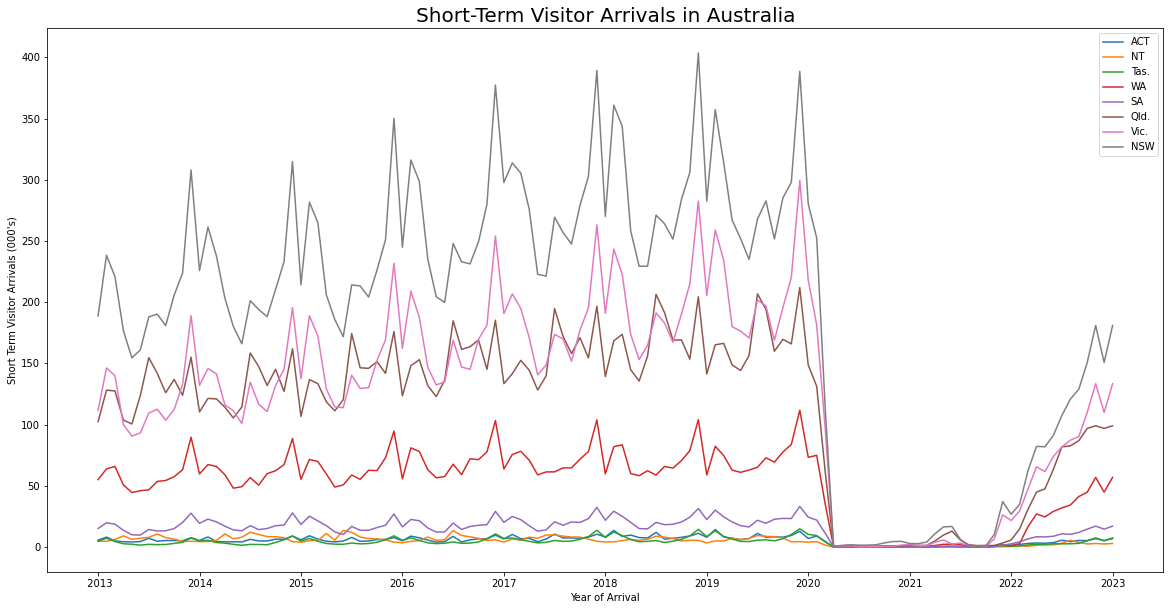

In [259]:
# Create a unformatted graph of the Flight Data to identify what requires adjustment

flight_data.plot.line(x = "Year of Arrival", figsize = (20, 10))

plt.title("Short-Term Visitor Arrivals in Australia", fontsize = 20)
plt.xticks(np.arange(0, 121, step = 12), [' 2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
plt.ylabel("Short Term Visitor Arrivals (000's)")

The Pre-Covid line equation is: y = 0.21x + 57.7
The Post-Covid line equation is: y = 1.55x + -147.25


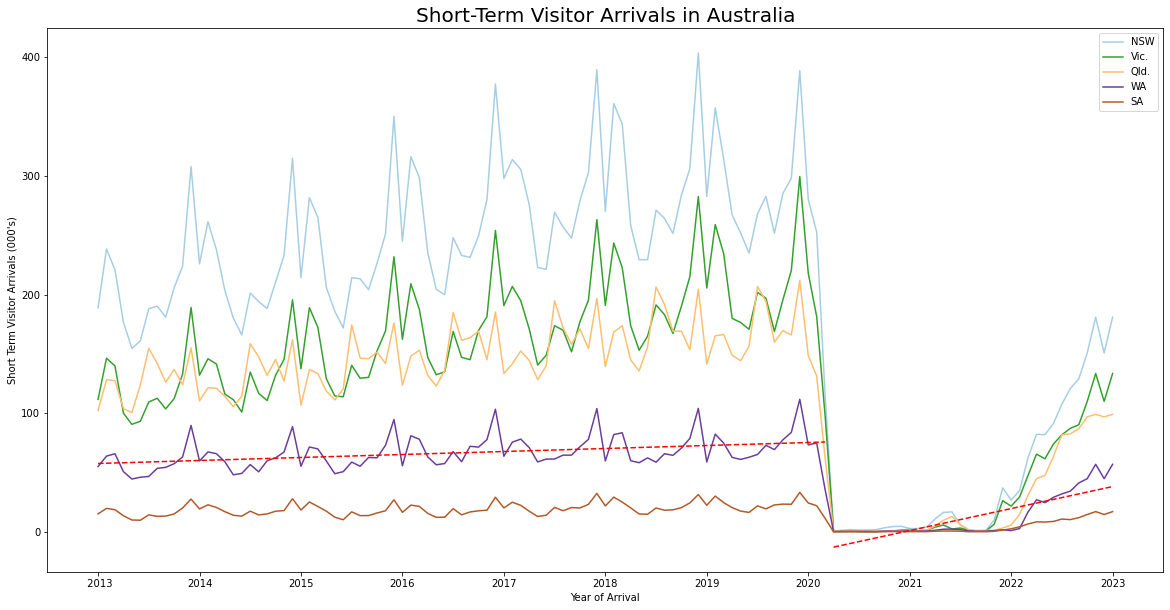

In [237]:
# Plot the trendlines on the Short-Term Visitor Arrivals in Australia graph (following WA's trend)
    # Drop the 4 states with the lowest values
x = range(0,87)
y = pre_covid_growth["WA"]
z = np.polyfit(x,y,1)
p = np.poly1d(z)
(slope, intercept, rvalue, pvalue, std_err) = st.linregress(x, y)
fit = slope * x + intercept
pre_line_eq = "The Pre-Covid line equation is: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(pre_line_eq)

a = range(87,121)
b = post_covid_growth["WA"]
c = np.polyfit(a,b,1)
d = np.poly1d(c)
(slope, intercept, rvalue, pvalue, std_err) = st.linregress(a, b)
fit = slope * a + intercept
post_line_eq = "The Post-Covid line equation is: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(post_line_eq)

flight_data.plot.line(x = "Year of Arrival", y = ["NSW", "Vic.", "Qld.", "WA", "SA"], figsize = (20, 10), colormap = "Paired")

plt.title("Short-Term Visitor Arrivals in Australia", fontsize = 20)
plt.xticks(np.arange(0, 121, step = 12), [' 2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
plt.ylabel("Short Term Visitor Arrivals (000's)")
plt.plot(x, p(x), color = 'red', linestyle = 'dashed')
plt.plot(a, d(a), color = 'red', linestyle = 'dashed')

plt.savefig("Short-Term Visitor Arrivals.png")

In [260]:
# # Load the "Part Time Job Data". This data reveals employment rate within Australia for the tourism industry

part_time_jobs_load = os.path.join("part_time.csv")
part_time_jobs = pd.read_csv(part_time_jobs_load)
part_time_jobs = part_time_jobs.dropna()
part_time_jobs = part_time_jobs.rename(columns={'Year' : "Employment Year"})
part_time_jobs

,Employment Year,Male main jobs,Female main jobs,Total tourism part time main jobs
0,2004-05,63.7,143.3,207.0
1,2005-06,61.4,143.3,204.7
2,2006-07,68.0,149.6,217.5
3,2007-08,67.8,144.5,212.3
4,2008-09,70.4,152.2,222.6
5,2009-10,78.6,160.5,239.0
6,2010-11,78.5,154.9,233.4
7,2011-12,80.1,161.4,241.5
8,2012-13,84.7,172.4,257.1
9,2013-14,89.5,171.6,261.0


In [257]:
# Determine the proportion of male to female jobs provided by the part time data.

employment_year = part_time_jobs["Employment Year"]
male_proportion_annual = part_time_jobs["Male main jobs"]/part_time_jobs["Total tourism part time main jobs"]
female_proportion_annual = part_time_jobs["Female main jobs"]/part_time_jobs["Total tourism part time main jobs"]
total_proportion = male_proportion_annual + female_proportion_annual

data = {"Male Proportion": male_proportion_annual,
        "Female Proportion": female_proportion_annual,
        "Total Tourism Jobs": total_proportion}

proportion_data = pd.DataFrame(data)
proportion_data.round(decimals=2)

,Male Proportion,Female Proportion,Total Tourism Jobs
0,0.31,0.69,1.0
1,0.30,0.70,1.0
2,0.31,0.69,1.0
3,0.32,0.68,1.0
4,0.32,0.68,1.0
5,0.33,0.67,1.0
6,0.34,0.66,1.0
7,0.33,0.67,1.0
8,0.33,0.67,1.0
9,0.34,0.66,1.0


In [240]:
# Determine the correlation coefficient to Year of Employment and Total number of jobs

x = range(0,18)
y = part_time_jobs["Total tourism part time main jobs"]

pre_correlation = st.pearsonr(x, y)
pre_correlation
print(f'The correlation coefficient between the Employment Year and Total Tourism Jobs is {round(pre_correlation[0],2)}')

The correlation coefficient between the Employment Year and Total Tourism Jobs is 0.64


In [241]:
# Get the summary statistics of the data

part_time_jobs.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Male main jobs,Female main jobs,Total tourism part time main jobs
count,18,18,18
mean,85.0056,166.511,251.5
std,15.9199,22.482,37.6652
min,61.4,131.5,204.7
25%,72.3,150.25,218.775
50%,82.4,160.95,244.95
75%,97.825,177.2,274.95
max,115.1,210.6,323.6


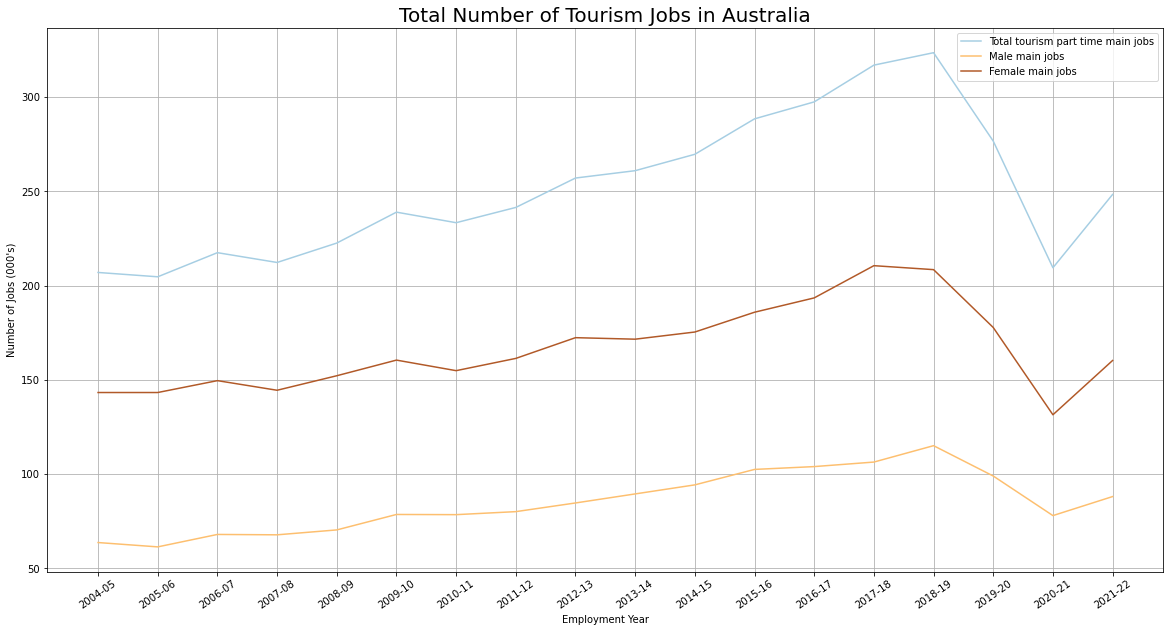

<Figure size 432x288 with 0 Axes>

In [242]:
# Plot the data into a line graph to observe the data and make adjustements

fig = part_time_jobs.plot.line(x = "Employment Year", y = ["Total tourism part time main jobs", "Male main jobs", "Female main jobs"], figsize = (20, 10), colormap = "Paired")

plt.ylabel("Number of Jobs (000's)")
plt.title("Total Number of Tourism Jobs in Australia", fontsize = 20)
plt.xticks(np.arange(0, 18, step = 1), ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18','2018-19', '2019-20', '2020-21', '2021-22'])
plt.xticks(rotation = 35)
plt.grid()
plt.show()

plt.savefig("Total Number of Tourism Jobs in Australia.png")

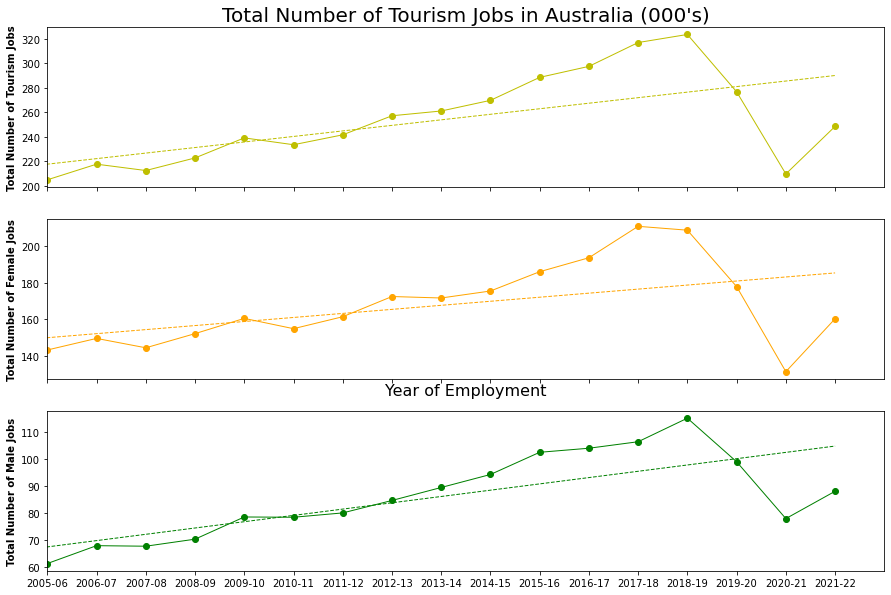

<Figure size 432x288 with 0 Axes>

In [274]:
# Create a secondary rgaph which displays the trendlines for each group:
    # Male, Female and Total Jobs

total_jobs = part_time_jobs["Total tourism part time main jobs"]
male_jobs = part_time_jobs["Male main jobs"]
female_jobs = part_time_jobs["Female main jobs"]
employment_year = part_time_jobs["Employment Year"]
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize = (15, 10))

ax1.set_xlim(min(x), max(x))

x1 = range(0,18)
y1 = total_jobs
z1 = np.polyfit(x1,y1,1)
p1 = np.poly1d(z1)
ax1.set_title("Total Number of Tourism Jobs in Australia (000's)", fontsize = 20)
ax1.plot(employment_year, total_jobs, linewidth = 1, marker = "o", color = "y")
ax1.plot(x1, p1(x1), color = 'y', linestyle = 'dashed', linewidth = 1)
ax1.set_ylabel("Total Number of Tourism Jobs", fontweight = 'bold')

x2 = range(0,18)
y2 = female_jobs
z2 = np.polyfit(x2,y2,1)
p2 = np.poly1d(z2)
ax2.plot(employment_year, female_jobs, linewidth = 1, marker = 'o', color = 'orange')
ax2.plot(x2, p2(x2), color = 'orange', linestyle = 'dashed', linewidth = 1, )
ax2.set_ylabel("Total Number of Female Jobs", fontweight = 'bold')
ax2.set_xlabel("Year of Employment", fontsize = 16)

x3 = range(0,18)
y3 = male_jobs
z3 = np.polyfit(x3,y3,1)
p3 = np.poly1d(z3)
ax3.plot(employment_year, male_jobs, linewidth = 1, marker = 'o', color = 'g')
ax3.plot(x3, p3(x3), color = 'g', linestyle = 'dashed', linewidth = 1)
ax3.set_ylabel("Total Number of Male Jobs", fontweight = 'bold')

plt.show()
plt.savefig("stacked_total_jobs.png")

In [280]:
# Get the r-value for the:
    # Total part time jobs, female part time jobe and male part time jobs

x = range(0,18)
y = total_jobs
pre_correlation = st.pearsonr(x, y)
pre_correlation
print(f'The correlation coefficient between the total jobs and year of employment is: {round(pre_correlation[0],2)}')

x1 = range(0,18)
y1 = female_jobs
pre_correlation = st.pearsonr(x1, y1)
pre_correlation
print(f'The correlation coefficient between female jobs and year of employment is: {round(pre_correlation[0],2)}')

x2 = range(0,18)
y2 = male_jobs
pre_correlation = st.pearsonr(x2, y2)
pre_correlation
print(f'The correlation coefficient between tmale jobs and year of employment is: {round(pre_correlation[0],2)}')





The correlation coefficient between the total jobs and year of employment is: 0.64
The correlation coefficient between female jobs and year of employment is: 0.52
The correlation coefficient between tmale jobs and year of employment is: 0.78
